In [24]:
# AMS 595 - Python Project 4
## Q5 using Original Dataset
#!pip install torch torchvision torchaudio
# !!! I had trouble installing torch. Instead I will use the deep learning model: MLP neural network. !!!

# Import packages
import h5py
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [21]:
# We load the given datasets and put them into training and testing variables x and y.
with h5py.File("train_catvnoncat.h5", "r") as f:
    X_train = np.array(f["train_set_x"])
    Y_train = np.array(f["train_set_y"])

with h5py.File("test_catvnoncat.h5", "r") as f:
    X_test = np.array(f["test_set_x"])
    Y_test = np.array(f["test_set_y"])

# Need to flatten and normalize the dataset
X_train = X_train.reshape(len(X_train), -1) / 255.0
X_test  = X_test.reshape(len(X_test), -1) / 255.0

# We initialize and train neural network classifier
model = MLPClassifier(hidden_layer_sizes=(128, 64),
                      activation='relu',
                      solver='adam',
                      max_iter=40,
                      random_state=0)
# FIt the model
model.fit(X_train, Y_train)
# there should be a warning for max iterations but it is okay, will not impact the output result.

C:\Users\zhubr\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=40, random_state=0)

Training Accuracy: 0.7847
Test Accuracy: 0.6000

Misclassified Test Indices: [ 6 10 11 13 17 18 19 20 23 26 28 29 30 33 38 40 42 44 46 48]


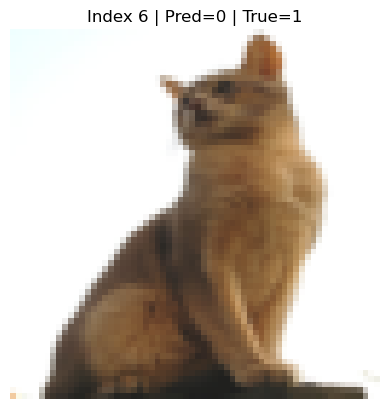

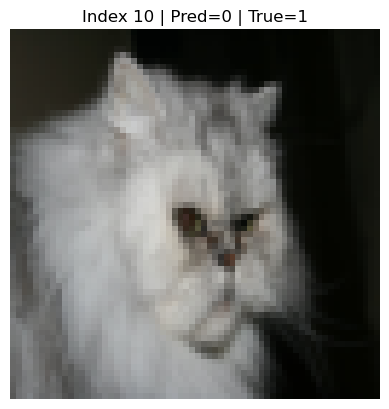

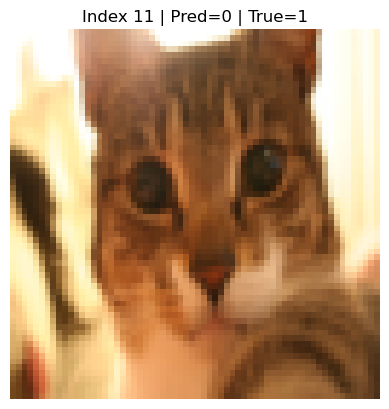

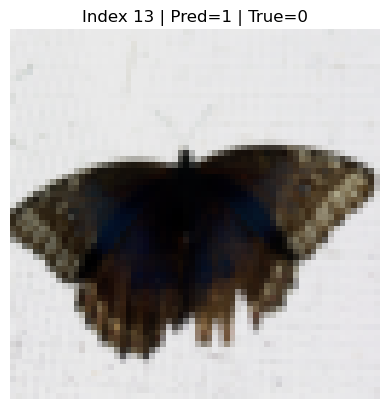

In [28]:
# We evaluate by predicting the model of both training and testing data.
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# compute the accuracy of both datasets
train_acc = np.mean(pred_train == Y_train)
test_acc = np.mean(pred_test == Y_test)

#Printed accuracy
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Misclassified indices to see which ones were misclassified
mis_idx = np.where(pred_test != Y_test)[0]
print("\nMisclassified Test Indices:", mis_idx)

# Display the 4 misclassified test images that is asked
for i in mis_idx[:4]:
    plt.imshow(X_test[i].reshape(64, 64, 3))
    plt.title(f"Index {i} | Pred={pred_test[i]} | True={Y_test[i]}")
    plt.axis("off")
    plt.show()